## TREE STRUCTURE PARZEN ESTIMATOR FROM STRACH
__Why Build this?__
It is a traditional to hyperparameter tuning method that use Bayesian Optimization Method.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
#Generate some random data
import numpy as np
np.random.seed(1)
x = np.linspace(0,100,1000)
m = np.random.randint(0,100)
b = np.random.randint(-5000,5000)
y = m*x + b + np.random.randn(1000)*700

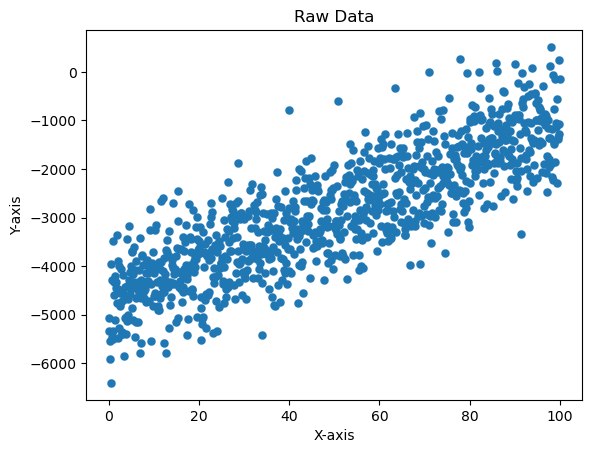

In [10]:
plt.scatter(x, y,linewidths=0.1)
plt.title('Raw Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

### Since TPE is an optimzing algorithm we will use soem metric to optimize over. Lets use RMSE. 

In [12]:
def rmse(m,b):
    "take coefficient m & b and return RMSE"
    pred = m*x + b
    return np.sqrt(((pred - y)**2).sum()/len(pred))
    

### In TPE we need to have some initial beliefs about our best hyperparameters.
Lets say that the slope of the line of best fit lies between (0,100)
and the intercept is also uniform variable from (-6000,-3000)

We will use a class to encapsulate these variables

In [14]:
class UniformDist:
    def __init__(self, min_, max_):
        "constructor to initialize min. and max. values"
        self.min = min_
        self.max = max_
        
    def sample(self, n_samples):
        "return sample from our distribution"
        return np.random.uniform(self.min, self.max, n_samples)

In [15]:
#defining hyperparameter search space
search_space = {'m':UniformDist(0,100), 'b':UniformDist(-6000,-3000)}

In [17]:
n_samples = 50
space = search_space
seed = np.array([space[hp].sample(n_samples) for hp in space])
print(seed)

[[ 7.39611963e+01  3.76038786e+00  7.64726639e+01  5.18281580e+01
   5.31653296e-01  2.77200105e+01  5.34832233e+01  7.67962878e+01
   5.30925955e+00  5.49053444e+01  8.00994556e+01  6.49583055e+01
   9.31447015e+01  7.47314450e+00  2.76806463e+01  9.19237504e+01
   7.65005148e+01  5.99740344e+01  8.32968144e+01  8.96043492e+01
   9.72720353e+01  9.98520507e+01  1.39649334e+01  7.05420447e+00
   7.34666544e+00  1.47437909e+00  9.71820073e+01  9.47669165e+00
   8.41736826e+01  6.85172997e+01  4.87557167e+01  3.46694881e+01
   3.53647787e+01  2.53838882e+01  9.11017974e+01  7.25642545e+01
   2.59257928e+00  4.61521253e+01  2.81301273e+01  2.89661862e+00
   8.84681894e+01  7.71005358e+01  3.29735079e+01  7.96558588e+01
   3.24638322e+01  3.07882444e+01  9.28109079e+01  9.76916162e+01
   5.23555305e+01  9.51935168e+01]
 [-3.33601052e+03 -4.44590232e+03 -4.88175359e+03 -3.86893627e+03
  -4.63306973e+03 -4.18436131e+03 -3.02878141e+03 -3.67825125e+03
  -4.99717079e+03 -5.73300534e+03 -5.4452

TypeError: scatter() missing 1 required positional argument: 'y'